In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 3 notebook

In [2]:
## Load posterior mean dataframe
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))
print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))
print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

mpl.rcParams.update({'font.size': 16})

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 3A: Dependence of intermeal interval on stomach fullness at meal termination (show data and model?)

sim_data
PYY_7.5_A_D


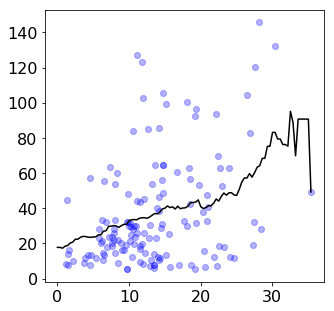

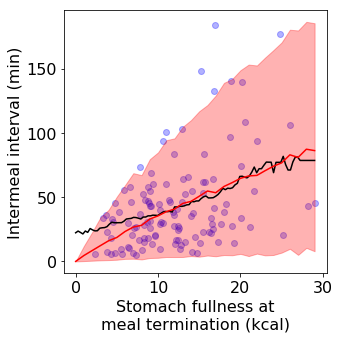

PYY_1.5_R_L


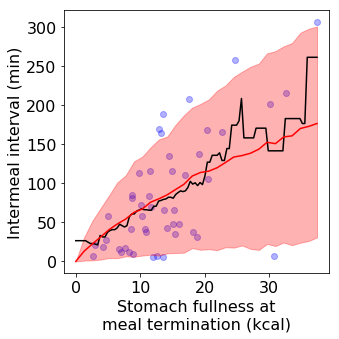

Lep_2.0_A_D


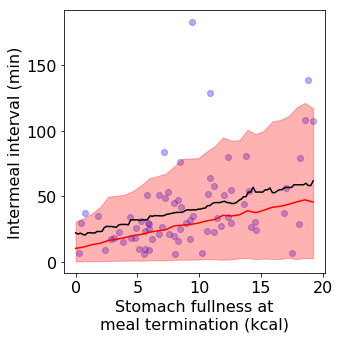

saline_0.0_R_D


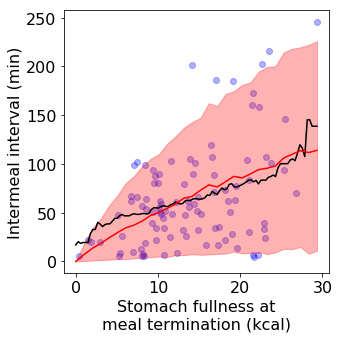

PYY_1.5_A_D


In [ ]:
reload(plots)
reload(helpers)

root_dir = 'new_all_data/'
cutoff = 300
num_samples = 1000
windowsize = 5

for i in os.listdir(root_dir):
    print i
    try:
        data_dir = root_dir + i + '/'
        fig, axes = plots.plot_IMI(data_dir, 
                                   group_dict, 
                                   cutoff=cutoff, 
                                   num_samples=num_samples,
                                   windowsize=windowsize)
        
        axes.set_xlabel('Stomach fullness at\nmeal termination (kcal)')
        axes.set_ylabel('Intermeal interval (min)')
        
    except KeyError:
        continue
        
        
    ## Save figure
    fig.tight_layout()
    figname = 'figures/3A_%s.svg' %(i)
    plt.savefig(figname)
    
    plt.show()

## Figure 3B: Satiety ratio predictions are wrong for multiple reasons

In [ ]:
reload(helpers)
reload(plots)

root_dir = 'new_all_data/'
cutoff = cutoff # use previous value
windowsize = 3

for i in os.listdir(root_dir):
    print i
    data_dir = root_dir + i + '/'
    fig, axes = plots.plot_satiety_ratio(data_dir, 
                                         cutoff=cutoff,
                                         windowsize=windowsize)
    axes.set_xlabel('Meal size (kcal)')
    axes.set_ylabel('Intermeal interval (min)')
    
    ## Save figure
    fig.tight_layout()
    figname = 'figures/3B_%s.svg' %(i)
    plt.savefig(figname)
    
    plt.show()

## Figure 3C: Comparison between predicted and true intermeal interval using group satiety ratio, group posterior, and individual posterior data

In [ ]:
reload(plots)
reload(helpers)

fig, axes = plots.intake_fullness(df, cutoff=300)

## Save figure
fig.tight_layout()
plt.savefig('figures/3C.svg')

plt.show()

## Figure 3D/E: Individual posterior mean values of stomach dependent and stomach independent intermeal interval parameters coloured by (D) treatment group and (E) normalised food intake

In [4]:
reload(plots)
reload(helpers)

fig, axes = plots.pairplot(df, 'theta7', 'theta8', ctype='drug_c', figsize=(10,10))
axes.set_xlabel('Stomach independent parameter $L_{1}$ (a.u.)')
axes.set_ylabel('Stomach dependent parameter $L_{2}$ (a.u.)')

## Save figure
fig.tight_layout()
plt.savefig('figures/3D.svg')

fig2, axes2 = plots.pairplot(df, 'theta7', 'theta8', ctype='rate_c')
axes2.set_xlabel('Stomach independent parameter $L_{1}$ (a.u.)')
axes2.set_ylabel('Stomach dependent parameter $L_{2}$ (a.u.)')

## Save figure
fig2.tight_layout()
plt.savefig('figures/3E.svg')

plt.show()

Using matplotlib backend: Qt5Agg


## Insets to above figure

2.17776317714
2.39349091536


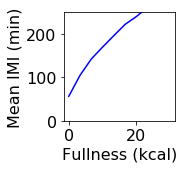

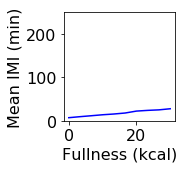

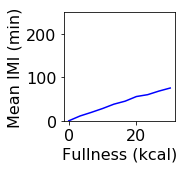

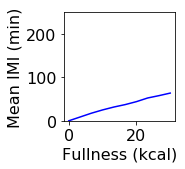

In [3]:
reload(plots)

## Inset for max theta8
sorted_df = df.sort_values('theta8', ascending=False)
theta7 = np.power(10., sorted_df.iloc[0]['theta7'])
theta8 = np.power(10., sorted_df.iloc[0]['theta8'])
fig, axes = plots.IMI_inset(theta7, theta8, num_samples=1000)
axes.set_xlabel('Fullness (kcal)')
axes.set_ylabel('Mean IMI (min)')
axes.set_ylim([0, 15000/60])

plt.savefig('figures/3a_max_theta8.svg')


## Inset for min theta8
sorted_df = df.sort_values('theta8', ascending=True)
theta7 = np.power(10., sorted_df.iloc[0]['theta7'])
theta8 = np.power(10., sorted_df.iloc[0]['theta8'])
fig, axes = plots.IMI_inset(theta7, theta8, num_samples=1000)
axes.set_xlabel('Fullness (kcal)')
axes.set_ylabel('Mean IMI (min)')
axes.set_ylim([0, 15000/60])

plt.savefig('figures/3a_min_theta8.svg')

## Inset for min theta7
sorted_df = df.sort_values('theta7', ascending=True)
theta7 = np.power(10., sorted_df.iloc[0]['theta7'])
theta8 = np.power(10., sorted_df.iloc[0]['theta8'])
fig, axes = plots.IMI_inset(theta7, theta8, num_samples=1000)
axes.set_xlabel('Fullness (kcal)')
axes.set_ylabel('Mean IMI (min)')
axes.set_ylim([0, 15000/60])

plt.savefig('figures/3a_min_theta7.svg')

## Inset for medium theta7
idx = 80
sorted_df = df.sort_values('theta8', ascending=True)
print sorted_df.iloc[idx]['theta7']
print sorted_df.iloc[idx]['theta8']
#theta7 = np.power(10., sorted_df.iloc[idx]['theta7'])
#theta8 = np.power(10., sorted_df.iloc[idx]['theta8'])
theta8 = np.power(10., 3.18)
theta8 = np.power(10., 2.28)
fig, axes = plots.IMI_inset(theta7, theta8, num_samples=1000)
axes.set_xlabel('Fullness (kcal)')
axes.set_ylabel('Mean IMI (min)')
axes.set_ylim([0, 15000/60])

plt.savefig('figures/3a_med_theta7.svg')

plt.show()

## Colourbar

In [ ]:
cmap = mpl.cm.plasma

feeding_amts = df['rate']
feed_min = np.min(feeding_amts)
feed_max = np.max(feeding_amts)

norm = mpl.colors.Normalize(vmin=feed_min, vmax=feed_max)

fig, axes = plt.subplots(1, figsize=(0.5,5))

cb1 = mpl.colorbar.ColorbarBase(axes, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

cb1.set_label('Normalised food intake (g/hr)')

plt.savefig('figures/colorbar.svg')

plt.show()

## Legend

In [ ]:
fig, axes = plt.subplots(1, figsize=(5,5))

drugs = df['drug'].unique()

for drug in drugs:
    if drug == 'saline':
        
        ## Adlib
        displaytext = 'Saline (fed)'
        dose = 0.0
        recover = 'A'
        period = 'L'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        ## Refeeding
        displaytext = 'Saline (fast)'
        dose = 0.0
        recover = 'R'
        period = 'L'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'PYY':
        displaytext = 'PYY'
        dose = 300.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 7.5
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 1.5
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'GLP-1':
        displaytext = 'GLP-1'
        dose = 300.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 100.0
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 30.0
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'LiCl':
        displaytext = 'LiCl'
        dose = 64.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 32.0
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'Lep':
        displaytext = 'Leptin'
        dose = 2.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    else:
        continue

axes.legend(numpoints=3, fancybox=True, loc=2)

plt.savefig('figures/legend.svg')

plt.show()